In [1]:
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline


In [2]:
# E-step
def EStep(k_size, y, lambda_vec, coef_vec, sigma2_vec):
    '''
    y[i]
    lambda[k]
    mu[k]
    sigma[k]
    '''
    I = len(y)
    # 中身を初期化せずに配列を作成する関数である。
    # 2行, 1000列の配列を生成
    responsibility = sp.empty((k_size, I))
    
    for k in sp.arange(k_size):
        norm = stats.norm(loc=np.mean(X@coef_vec[k]), scale=sp.sqrt(sigma2_vec[k]))
        responsibility[k] = norm.pdf(y)

    responsibility = responsibility / sp.sum(responsibility, axis=0)
    return responsibility

def MStep(k_size, responsibility, y):

    lambda_vec = sp.empty(k_size)
    #mu_vec = sp.empty(k_size)
    coef_vec = []
    sigma2_vec = sp.empty(k_size)
    

    for k in sp.arange(k_size):
        r_k = responsibility[k]
        #lambda_vec[k] = sp.sum(r_k) / sp.sum(responsibility)
        lambda_vec[k] = sp.sum(r_k) / responsibility.shape[1]
        #mu_vec[k] = sp.sum(r_k * y) / sp.sum(r_k)
        #coef_vec[k] = np.linalg.inv(X.T @ np.diag(r_k) @ X) @ X.T @np.diag(r_k)@y
        coef_vec.append(np.linalg.inv(X.T @ np.diag(r_k) @ X) @ X.T @np.diag(r_k)@y)
        sigma2_vec[k] = sp.sum(r_k * (y - mu_vec[k])**2) / sp.sum(r_k)
        
        
        

    return lambda_vec, coef_vec, sigma2_vec

In [3]:
def calc_mix_pdf(k_size, x, lambda_vec, coef_vec, sigma2_vec):
    pdf = sp.zeros_like(x)

    for k in sp.arange(k_size):
        norm_k = stats.norm(loc=np.mean(X@coef_vec[k]), scale=sp.sqrt(sigma2_vec[k]))
        
        # pdf (Probability density function) 確率密度関数
        # xのときの値を取得
        pdf += lambda_vec[k] * norm_k.pdf(x)
    return pdf

# データの作成

In [4]:
df = pd.read_excel("../../data/data_covid_fix_name.xlsx")
df = df.dropna().reset_index(drop=True)

In [5]:
df.head()

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
0,Albania,2866376,60.319,13364.155397,6.996524e+06,7.84,8.005411,7.67,70,74.3,1,108641,303.14
1,Algeria,42228429,72.629,15481.787620,9.108277e+06,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
2,Angola,30809762,65.514,6452.355165,1.049012e+07,5.40,5.979936,4.83,83,17.9,1,303691,76.94
3,Argentina,44494502,91.870,20610.568550,1.902562e+07,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
4,Australia,24992369,86.012,51663.365095,7.608913e+06,8.62,9.160533,8.07,26,97.3,1,1347,75667.65


In [6]:
y=np.log(df["date_first"]).values
X = df[["hf", "pop",  "urb", "gdp","dist", "air", "detection"]].values
X = np.log(X)
X = np.insert(X, 0, 1, axis=1)
pd.DataFrame(X, columns=["切片", "hf", "pop",  "urb", "gdp","dist", "air", "detection"])

,切片,hf,pop,urb,gdp,dist,air,detection
0,1.0,2.059239,14.868559,4.099647,9.500331,15.760924,5.714195,4.308111
1,1.0,1.607436,17.558604,4.285364,9.647420,16.024694,8.770663,2.484907
2,1.0,1.686399,17.243342,4.182264,8.772200,16.165944,4.343026,2.884801
3,1.0,1.925707,17.610876,4.520375,9.933559,16.761297,7.324246,4.316154
4,1.0,2.154085,17.034081,4.454487,10.852504,15.844831,11.234106,4.577799
...,...,...,...,...,...,...,...,...
145,1.0,1.335001,17.178320,4.479698,9.803805,16.527424,7.667519,2.163323
146,1.0,1.838961,18.375060,3.581266,8.915676,14.613322,10.758959,4.050044
147,1.0,1.458615,17.165369,3.601195,7.853654,15.602683,5.818033,2.197225
148,1.0,1.870263,16.669208,3.773244,8.348516,16.086144,2.186051,3.086487


In [7]:
y.shape

(150,)

(array([0.06713948, 0.        , 0.13427896, 0.30212766, 0.26855792,
        0.        , 0.20141844, 1.81276597, 1.91347519, 0.3356974 ]),
 array([2.63905733, 2.83764888, 3.03624043, 3.23483197, 3.43342352,
        3.63201507, 3.83060662, 4.02919817, 4.22778972, 4.42638126,
        4.62497281]),
 <a list of 10 Patch objects>)

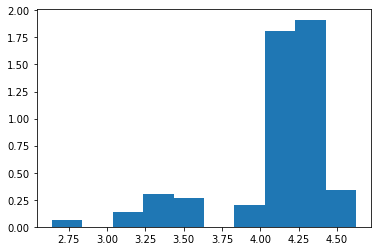

In [8]:
plt.hist(y, density=True)

# 初期値の設定  
- Rで計算済み

In [9]:
# 早期感染国のβ
# coef_early = [21.790, 0.994, 0.000, -0.014, 0.000, 0.000, 0.000, -0.124]
coef1_first = [-0.737, -0.331,0.041,0.258,-0.117,0.386,-0.106,-0.162]

# 晩期感染国のβ
# coef_late = [93.920, -0.915, 0.000, -0.213, 0.000, 0.000, 0.000, -0.116]
coef2_first = [5.383,-0.014,-0.030,-0.073,-0.058,0.023,0.001,-0.046]

first_df = pd.DataFrame(coef1_first, columns=["早期感染国β(初期値)"], index=["Intercept", "hf", "pop",  "urb", "gdp","dist", "air", "detection"])
first_df["晩期感染国β(初期値)"] = coef2_first
first_df

,早期感染国β(初期値),晩期感染国β(初期値)
Intercept,-0.737,5.383
hf,-0.331,-0.014
pop,0.041,-0.030
urb,0.258,-0.073
gdp,-0.117,-0.058
dist,0.386,0.023
air,-0.106,0.001
detection,-0.162,-0.046


In [10]:
# muの初期値の計算
# mu = βx
mu1_first = np.mean(X@coef1_first)
mu2_first = np.mean(X@coef2_first)

# データを早期、晩期に分割
y_early = np.log(df["date_first"][df["date_first"]<40])
y_late = np.log(df["date_first"][df["date_first"]>40])

# sigmaの初期値
sigma1_first = np.sum((y_early - np.mean(y))**2)/len(y_early)
sigma2_first = np.sum((y_late - np.mean(y))**2)/len(y_late)

In [11]:
# 混合正規分布の数
k_size = 2

# 正規分布の割合
lambda_vec=[0.5, 0.5]

# 説明変数のパラメータ
mu_vec = [mu1_first, mu2_first]

# 分散(sigma)の初期値
sigma2_vec=[sigma1_first, sigma2_first]

# coefの初期値
coef_vec = [coef1_first, coef2_first]

In [12]:
print("f1の混合比率", lambda_vec[0])
print("mu1", mu_vec[0])
print("sigma1", sigma2_vec[0])

f1の混合比率 0.5
mu1 3.915505630188653
sigma1 0.7065010356666221


In [13]:
print("f1の混合比率", lambda_vec[1])
print("mu1", mu_vec[1])
print("sigma1", sigma2_vec[1])

f1の混合比率 0.5
mu1 4.223545145694248
sigma1 0.04166125438652969


### 初期値から生成される分布の確認

/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.zeros_like is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros_like instead
  
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  after removing the cwd from sys.path.
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  """


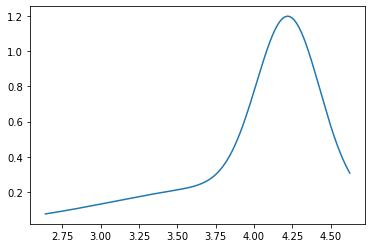

In [14]:
# データ(-6から6までを200こ)
x = sp.linspace(np.min(y), np.max(y), 10000)
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, coef_vec, sigma2_vec), label="ini")

# EMアルゴリズム

/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.empty is deprecated and will be removed in SciPy 2.0.0, use numpy.empty instead
  if sys.path[0] == '':
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  from ipykernel import kernelapp as app
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: scipy.sum is deprecated and

i: 0 lambda [0.34301396 0.65698604] mu [4.006597895968147, 4.221747618188662] sigma2 [0.27429664 0.01882022]
i: 5 lambda [0.40544599 0.59455401] mu [4.018340181203227, 4.2233101330366045] sigma2 [0.27764315 0.0143405 ]
i: 10 lambda [0.40554894 0.59445106] mu [4.018347339791316, 4.223308779245775] sigma2 [0.27762253 0.01432912]
i: 15 lambda [0.40554926 0.59445074] mu [4.018347361951401, 4.223308775199966] sigma2 [0.27762247 0.01432909]
i: 20 lambda [0.40554926 0.59445074] mu [4.01834736201926, 4.223308775186003] sigma2 [0.27762247 0.01432909]
i: 25 lambda [0.40554926 0.59445074] mu [4.018347362019497, 4.223308775187382] sigma2 [0.27762247 0.01432909]
i: 30 lambda [0.40554926 0.59445074] mu [4.018347362020327, 4.223308775187643] sigma2 [0.27762247 0.01432909]
i: 35 lambda [0.40554926 0.59445074] mu [4.018347362018343, 4.223308775185779] sigma2 [0.27762247 0.01432909]


/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.empty is deprecated and will be removed in SciPy 2.0.0, use numpy.empty instead
  if sys.path[0] == '':
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  from ipykernel import kernelapp as app
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: scipy.empty is deprecated and will 

i: 40 lambda [0.40554926 0.59445074] mu [4.018347362018503, 4.2233087751861165] sigma2 [0.27762247 0.01432909]
i: 45 lambda [0.40554926 0.59445074] mu [4.018347362020319, 4.223308775187479] sigma2 [0.27762247 0.01432909]
i: 50 lambda [0.40554926 0.59445074] mu [4.018347362020795, 4.223308775188281] sigma2 [0.27762247 0.01432909]


/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.zeros_like is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros_like instead
  
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  after removing the cwd from sys.path.
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  """
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.zeros_like is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros_like instead
  
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.arange is deprecated and w

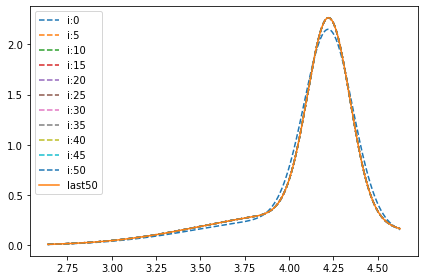

In [15]:
# 50回繰り返す
for i in sp.arange(50+1):
    # Estep
    # responsibilityの更新 
    # responsibility = EStep(k_size, y, lambda_vec, mu_vec, sigma2_vec)
    responsibility = EStep(k_size, y, lambda_vec, coef_vec, sigma2_vec)
    
    # Mstep
    # 混合割合, 平均, 分散の更新
    lambda_vec, coef_vec, sigma2_vec = MStep(k_size, responsibility, y)
    mu_vec = [np.mean(X@coef_vec[0]), np.mean(X@coef_vec[1])]
    
    if i % 5 == 0:
        print("i:", i, "lambda", lambda_vec, "mu", mu_vec, "sigma2", sigma2_vec)
        plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, coef_vec, sigma2_vec), label=f"i:{i}", linestyle="--")
        
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, coef_vec, sigma2_vec), label=f"last{i}", linestyle="-")

plt.legend()
plt.tight_layout()
plt.show()

/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.zeros_like is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros_like instead
  
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  after removing the cwd from sys.path.
/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  """


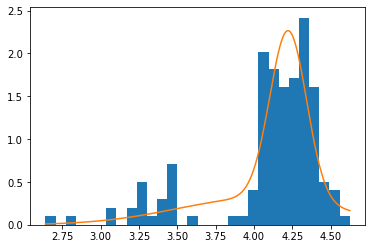

In [16]:
plt.hist(y, bins=30, density=True)
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, coef_vec, sigma2_vec), label="ini")

In [17]:
# 推定されたパラメータ
res_df = pd.DataFrame(coef_vec[0], index=["Intercept", "hf", "pop",  "urb", "gdp","dist", "air", "detection"], columns=["早期感染国"])
res_df["晩期感染国"] = coef_vec[1]
res_df

,早期感染国,晩期感染国
Intercept,3.096530,5.250527
hf,-0.772971,-0.068626
pop,-0.087859,-0.026982
urb,0.063872,-0.077164
gdp,-0.077373,-0.046336
dist,0.297424,0.025414
air,-0.051939,0.002024
detection,-0.000446,-0.033114


In [18]:
# 初期値パラメータ
first_df

,早期感染国β(初期値),晩期感染国β(初期値)
Intercept,-0.737,5.383
hf,-0.331,-0.014
pop,0.041,-0.030
urb,0.258,-0.073
gdp,-0.117,-0.058
dist,0.386,0.023
air,-0.106,0.001
detection,-0.162,-0.046


# 改善事項  
- p値  
- 信頼区間  
- AIC  
  
  
- 対数化しない場合  
- 変数選択  
- f1とf2で変数を帰る